In [1]:
from PIL import Image
import cv2 as cv
import os
import sys
from tqdm.notebook import tqdm
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

import torchvision.transforms as transforms

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.plot_wrapper import *
from utils.fix_resolutions import *

In [2]:
load_dotenv()
root = os.getenv("root", ".")

tiger_name = "K 15 M"

In [3]:
data_path = os.path.join(root, "data")
tiger_path = os.path.join(data_path, tiger_name)

images = [cv.imread(os.path.join(tiger_path, f)) for f in os.listdir(tiger_path)]
images = [cv.cvtColor(img, cv.COLOR_BGR2RGB) for img in images]
images = [Image.fromarray(img) for img in images]

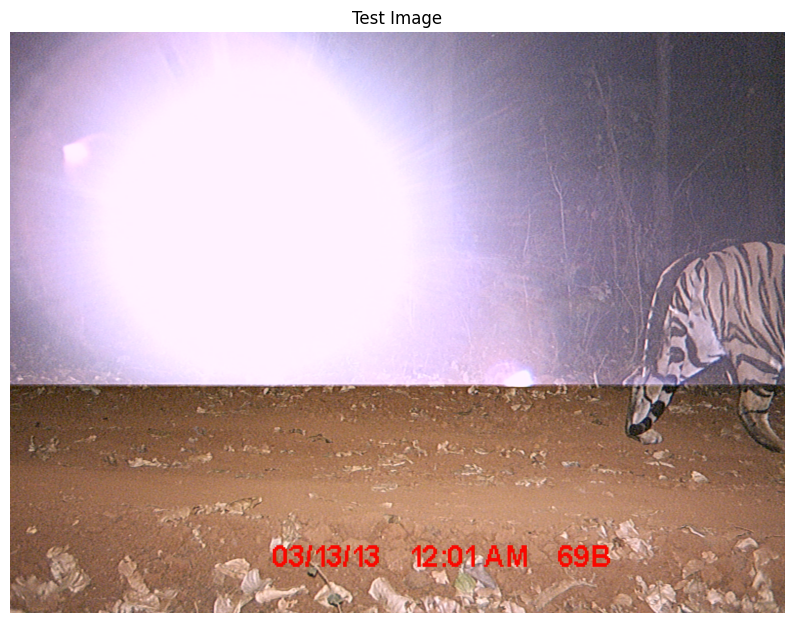

In [4]:
test_image = images[3]
plot_image(test_image, title="Test Image")

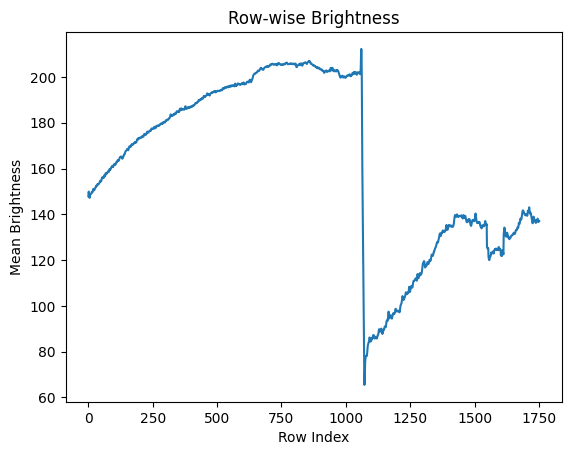

In [5]:
test_image_np = np.array(test_image)
row_brightness = test_image_np.mean(axis=(1, 2))
plt.plot(row_brightness)
plt.title("Row-wise Brightness")
plt.xlabel("Row Index")
plt.ylabel("Mean Brightness")
plt.show()

Text(0.5, 1.0, 'Border Row: 1062')

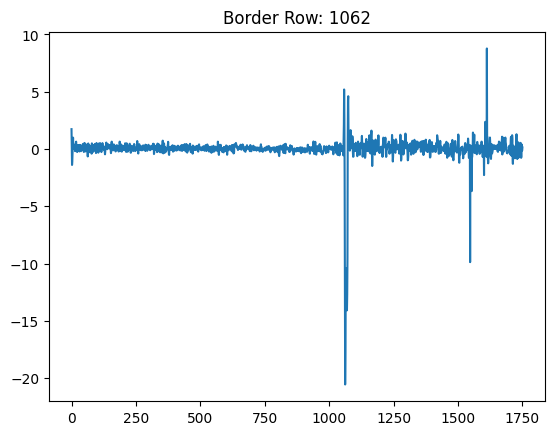

In [6]:
diff = np.diff(row_brightness)
border = np.argmax(np.abs(diff))
plt.plot(diff)
plt.title(f"Border Row: {border}")

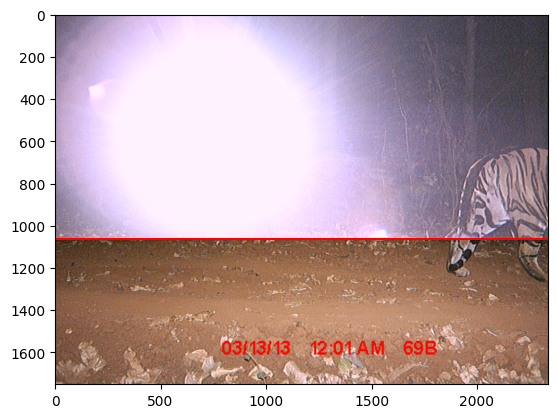

In [13]:
fig, ax = plt.subplots()
ax.imshow(test_image)
ax.axhline(y=border, color='red')
plt.show()